# SVM : Support Vector Machine
 군집간 선긋기 선사이 갖아 가까운 점 2개 사이 거리가 가장 먼 선   
 단점은 퍼포먼스가 떨어짐,

### SVM을 활용한 비만도:BMI: 측정 예측
- BMI = 몸무게(kg) / 키(m) * 키(m)
- BMI가 18.5이상 25미만일 때가 표준 몸무게 입니다.

In [5]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성.
# 키(cm), 몸무게(kg), label(저체중(thin), 정상체중(normal), 비만(fat))의 csv 생성

import random

# BMI를 계산해서 label을 return하는 함수
def calc_bmi(h,w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'

# 저장 파일 준비하기
fp = open('../Data/bmi.csv','w',encoding='utf-8') # fileopen write 모드 
fp.write('height,weight,label\r\n')

# 무작위로 데이터 생성하기
cnt = {'thin':0, 'normal':0, 'fat':0}

for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h,w)
    cnt[label] += 1 
    fp.write("{0},{1},{2}\r\n".format(h,w,label))

fp.close()
print('ok :',cnt)

ok : {'thin': 6361, 'normal': 5942, 'fat': 7697}


### BMI공식을 사용하지 않고 BMI 예측

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 데이터 불러오기
tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,181,45,thin
1,195,35,thin
2,152,44,normal
3,190,59,thin
4,195,41,thin


In [11]:
# 칼럼을 분리하여 정규화 하기
label = tbl['label']
w = tbl['weight'] / 80
h = tbl['height'] / 200 


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [17]:
wh = pd.concat([w,h],axis=1)

In [18]:
# 학습용과 훈련용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(wh,label,stratify=label)

In [34]:
# 데이터 학습하기
clf = SVC()
clf.fit(X_train,y_train)


SVC()

In [35]:
# 정확도 구하기
clf.score(X_test,y_test)

0.9976

In [36]:
# confusion Matrix 출력하기
pred = clf.predict(X_test)
print(metrics.classification_report(pred,y_test))
print(metrics.confusion_matrix(pred,y_test))


              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1923
      normal       1.00      1.00      1.00      1488
        thin       1.00      1.00      1.00      1589

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

[[1922    1    0]
 [   2 1481    5]
 [   0    4 1585]]


In [39]:
tbl

,height,weight,label
0,181,45,thin
1,195,35,thin
2,152,44,normal
3,190,59,thin
4,195,41,thin
...,...,...,...
19995,194,36,thin
19996,133,57,fat
19997,120,79,fat
19998,162,78,fat


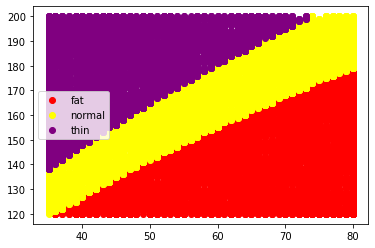

In [52]:
# 시각화 해보기
import matplotlib.pyplot as plt
tbl = pd.read_csv("../Data/bmi.csv",index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl,color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)

scatter('fat','red')
scatter('normal','yellow')
scatter('thin','purple')
ax.legend()
plt.savefig('../Data/bmi-test.png')
plt.show()


In [45]:
tbl.head()

,height,weight
label,,
thin,181,45
thin,195,35
normal,152,44
thin,190,59
thin,195,41


---
# SVM의 종류
- SVC(Classification)
- NuSVC : "
- LinearSVC : SVM중에서 가장 빠름, SVC대비 약 3배정도 빠름 (SVM의 속도 개선으로 나옴,예측력은 조금 떨어짐)

In [47]:
from sklearn import svm

In [50]:
# 데이터 학습하기
clf = svm.LinearSVC()

# 데이터 학습하기
clf.fit(X_train,y_train)

# 정확도 구하기
# confusion Matrix 출력하기
pred = clf.predict(X_test)

print(clf.score(X_test,y_test))
print(metrics.classification_report(pred,y_test))
print(metrics.confusion_matrix(pred,y_test))


0.925
              precision    recall  f1-score   support

         fat       1.00      0.91      0.95      2124
      normal       0.75      1.00      0.86      1113
        thin       1.00      0.90      0.95      1763

    accuracy                           0.93      5000
   macro avg       0.92      0.94      0.92      5000
weighted avg       0.94      0.93      0.93      5000

[[1924  200    0]
 [   0 1112    1]
 [   0  174 1589]]
